<a href="https://colab.research.google.com/github/jeansevenz/Projetos-Resilia1/blob/main/Projeto_M%C3%B3dulo5_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projetodo Mó dulo V
## Análise Exploratória das Cotas Parlamentares


### IMPORTAÇÃO DE BIBLIOTECAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from datetime import datetime

### IMPORTAÇÃO DE ARQUIVOS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
df_2019 = pd.read_csv('/content/drive/MyDrive/Ano-2019 (1).csv', sep = ';')
df_2019
df_2020 = pd.read_csv('/content/drive/My Drive/Ano-2020.csv', sep = ';')
df_2020
df_2021 = pd.read_csv('/content/drive/My Drive/Ano-2021.csv', sep = ';')
df_2021

### TRATAMENTO E LIMPEZA DE DADOS

In [ ]:
df_unico = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)
df_unico.head()

In [ ]:
df_unico.shape

In [ ]:
df_unico.head()

### QUESTÕES

**1. Como se comportam os gastos com cotas parlamentares ao longo do tempo? Existe alguma tendência de aumento ou redução desse custo?**

In [60]:
select = df_unico.groupby(['numAno'])['vlrDocumento'].sum()
round(select, 2).astype('str')

numAno
2019    213594719.63
2020     173029681.0
2021    104666561.06
Name: vlrDocumento, dtype: object

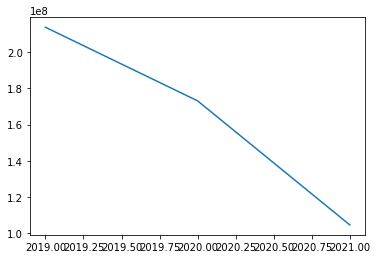

In [61]:
plt.plot(select.index, select)

**2. Qual a média de gastos por parlamentar?**

In [ ]:
select = round(df_unico.groupby(['txNomeParlamentar'])['vlrDocumento'].mean(), 2)
select

txNomeParlamentar
ABEL MESQUITA JR.       3063.72
ADAIL CARNEIRO          4224.91
ADALBERTO CAVALCANTI    2338.89
ADELMO CARNEIRO LEÃO    1289.62
ADELSON BARRETO          871.04
                         ...   
Zé Silva                 678.70
Zé Vitor                 847.64
Átila Lins              2016.82
Átila Lira              1605.24
Áurea Carolina           706.96
Name: vlrDocumento, Length: 846, dtype: float64

(array([339., 396.,  71.,  22.,   6.,   4.,   5.,   2.,   0.,   1.]),
 array([ -558.35 ,   842.746,  2243.842,  3644.938,  5046.034,  6447.13 ,
         7848.226,  9249.322, 10650.418, 12051.514, 13452.61 ]),
 <a list of 10 Patch objects>)

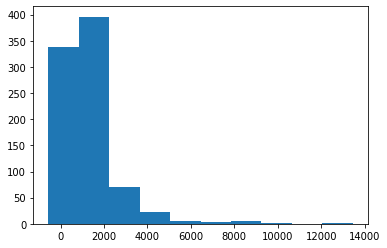

In [ ]:
plt.hist(select)

**3. Quais foram os parlamentares que mais e que menos consumiram recursos?**

In [49]:
df_unico2 = df_unico[df_unico['vlrDocumento'] >= 0]
df_menos = df_unico2.groupby(['txNomeParlamentar'])['vlrDocumento'].sum().sort_values().head(5)
print(f'MENOR -\n {df_menos}')
df_mais = df_unico.groupby(['txNomeParlamentar'])['vlrDocumento'].sum().sort_values(ascending = False).head(5)
print(f'MAIOR -\n {df_mais}')

MENOR -
 txNomeParlamentar
LUCIANA SANTOS    0.49
MANDETTA          0.60
DaLua do Rota     1.08
SARNEY FILHO      1.25
ROCHA             2.53
Name: vlrDocumento, dtype: float64
MAIOR -
 txNomeParlamentar
Jéssica Sales         1416133.42
Wellington Roberto    1385090.81
Perpétua Almeida      1376839.42
Silas Câmara          1373755.01
Jesus Sérgio          1360451.70
Name: vlrDocumento, dtype: float64


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

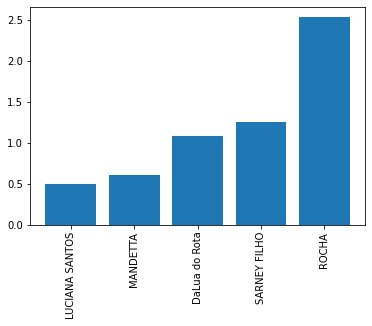

In [53]:
plt.bar(df_menos.index, df_menos)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

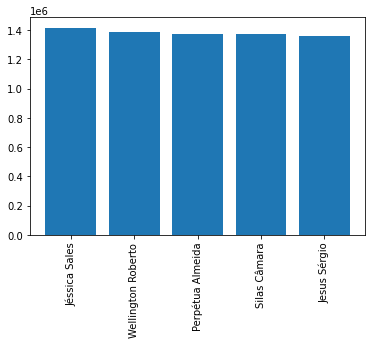

In [52]:
plt.bar(df_mais.index, df_mais)
plt.xticks(rotation = 90)

**4. Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?**

In [55]:
df_mais_onerosa = df_unico.groupby(['txtDescricao'])['vlrDocumento'].sum().sort_values(ascending = True)
df_mais_onerosa

txtDescricao
PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR            1.539535e+05
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                  1.940142e+05
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES                         4.450000e+05
ASSINATURA DE PUBLICAÇÕES                                    5.832491e+05
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                    1.836470e+06
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                   2.023309e+06
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.     2.617691e+06
LOCAÇÃO OU FRETAMENTO DE AERONAVES                           3.542367e+06
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.       3.610273e+06
SERVIÇOS POSTAIS                                             3.998291e+06
PASSAGEM AÉREA - REEMBOLSO                                   5.917361e+06
TELEFONIA                                                    1.237999e+07
PASSAGEM AÉREA - SIGEPA                                      2.060582e+07
COMBUSTÍVEIS E LUBRIFICAN

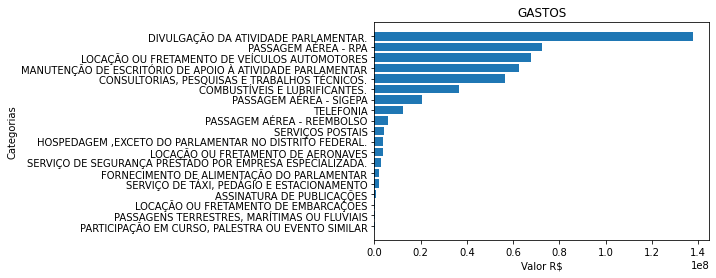

In [56]:
plt.barh(df_mais_onerosa.index, df_mais_onerosa)
plt.xlabel('Valor R$')
plt.ylabel('Categorias')
plt.title('GASTOS')
plt.show()